In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from black_scholes_merton import BSMoption
from drawings import *
%load_ext autoreload
%autoreload 2

# Sample 1
<img src="Pricing Samples - January 2020\Sample_2.png" height=450px/>

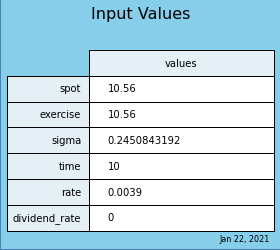

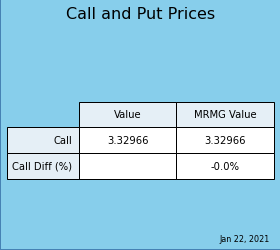

In [2]:
# spot, exercise, sigma, time, rate, dividend_rate = None
vars = [10.56, 10.56, .2450843192, 10, .0039, 0]
baseCall = 3.32965872

draw_both_tables(vars, baseCall)


# Sample 2
<img src="Pricing Samples - January 2020\Sample_3.png" height=450px/>

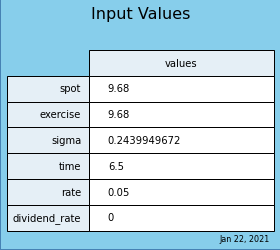

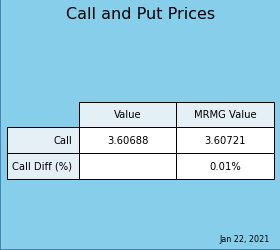

In [3]:
# spot, exercise, sigma, time, rate, dividend_rate = None
vars = [9.68, 9.68, .2439949672, 6.5, 0.05, 0]
baseCall = 3.60688165

draw_both_tables(vars, baseCall)


# Sample 3
<img src="Pricing Samples - January 2020\Sample_4.png" height=450px/>

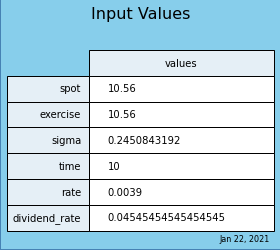

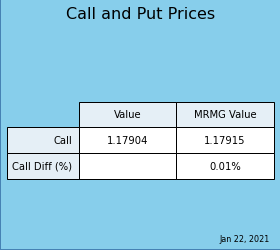

In [4]:
# spot, exercise, sigma, time, rate, dividend_rate = None
vars = [10.56, 10.56, .2450843192, 10, .0039, (.48/10.56)]
baseCall = 1.17903666

draw_both_tables(vars, baseCall)


# Sample 4
<img src="Pricing Samples - January 2020\Sample_5.png" height=450px/>

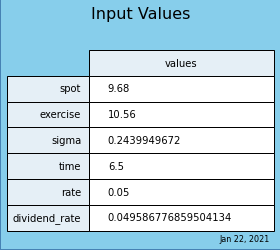

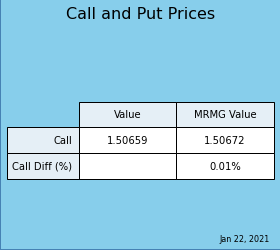

In [5]:
# spot, exercise, sigma, time, rate, dividend_rate = None
vars = [9.68, 10.56, .2439949672, 6.5, .05, (.48/9.68)]
baseCall = 1.50659347

draw_both_tables(vars, baseCall)

# Sample 5
<img src="Pricing Samples - January 2020\Sample_14.png" height=450px/>

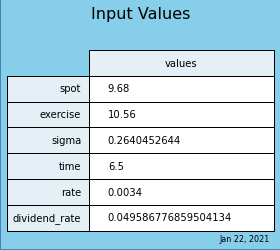

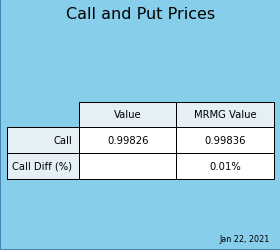

In [6]:
# spot, exercise, sigma, time, rate, dividend_rate = None
vars = [9.68, 10.56, .2640452644, 6.5, 0.0034, .48/9.68]
baseCall = .99825754

draw_both_tables(vars, baseCall)

# Sample 6
<img src="Pricing Samples - January 2020\Sample_15.png" height=450px/>

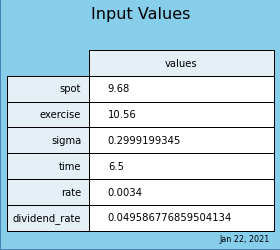

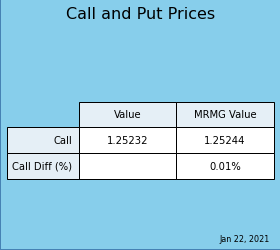

In [7]:
# spot, exercise, sigma, time, rate, dividend_rate = None
vars = [9.68, 10.56, .2999199345, 6.5, 0.0034, .48/9.68]
baseCall = 1.25231855

draw_both_tables(vars, baseCall)

# Sample 7
<img src="Pricing Samples - January 2020\Sample_16.png" height=450px/>

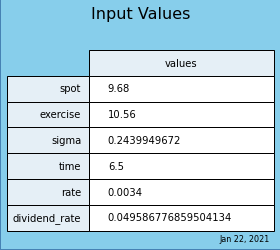

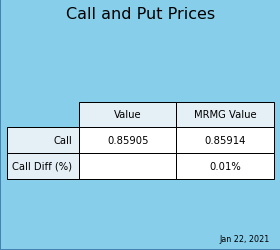

In [8]:
# spot, exercise, sigma, time, rate, dividend_rate = None
vars = [9.68, 10.56, .2439949672, 6.5, 0.0034, .48/9.68]
baseCall = .85905204

draw_both_tables(vars, baseCall)

# AON attestation check

## AON Base Option
<img src="Pricing Samples - January 2020\AON_base.png" height=450px/>

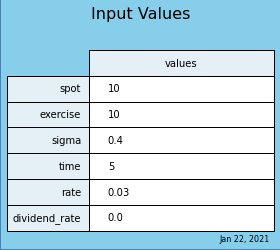

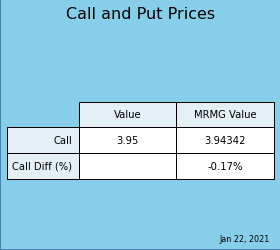

In [9]:
vars = [10, 10, .40, 5, .03, .0]
baseCall = 3.95

draw_both_tables(vars, baseCall)

# AON Sensitivity - Expected Life
<img src="Pricing Samples - January 2020\AON_base.png" height=450px/>

In [10]:
myOpt = BSMoption(*vars)

# AON Sensitivity - Changes in Life
<img src="Pricing Samples - January 2020\AON_2.png" height=450px/>

In [11]:
def sensitivity_table(sensitivity_label, sensitivity_vals, AON_FVs):
    sensitivity_label = 'Expected Life'
    sensitivity_vals = [1,2,3,4,5,6,7,8,9,10]
    AON_FVs = [1.71, 2.47, 3.04, 3.53, 3.95, 4.33, 4.66, 4.97, 5.25, 5.51]

    call_pxs = []
    for val in sensitivity_vals:
        myOpt.time = val
        call_pxs.append(round(myOpt.black_scholes_call(),2))

    df = pd.DataFrame(zip(sensitivity_vals, AON_FVs, call_pxs), columns=[sensitivity_label,'AON Value','MRMG Value'])
    df['Value Diff'] = round(df['AON Value'] - df['MRMG Value'],2)
    df['Percent Diff'] = ((df['MRMG Value'] / df['AON Value']) - 1)
    df['Percent Diff'] = df['Percent Diff'].apply(lambda x: f'{x * 100:0.2f}%')
    return df

In [14]:
from drawings import sensitivity_table

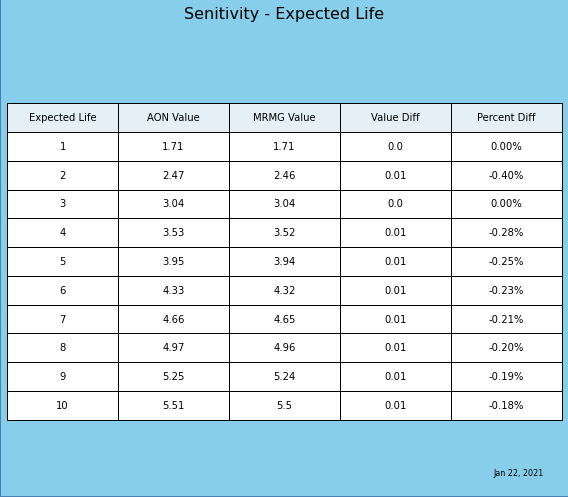

In [15]:
sensitivity_label = 'Expected Life'
var = 'time'
sensitivity_vals = [1,2,3,4,5,6,7,8,9,10]
AON_FVs = [1.71, 2.47, 3.04, 3.53, 3.95, 4.33, 4.66, 4.97, 5.25, 5.51]

sensitivity_table(myOpt, var, sensitivity_label, sensitivity_vals, AON_FVs);

AON Sensitivity - Vol
<img src="Pricing Samples - January 2020\AON_3.png" height=450px/>

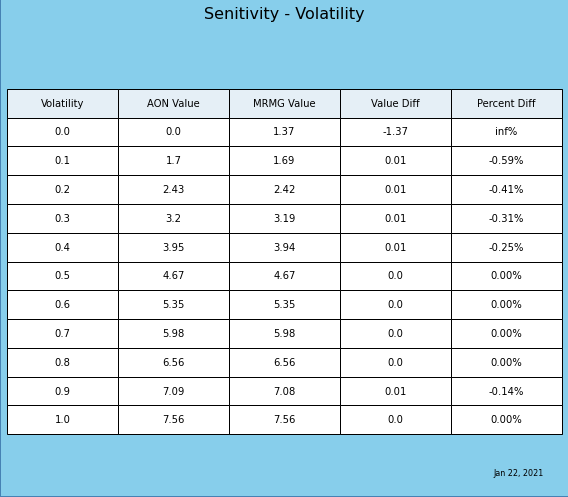

In [16]:
sensitivity_label = 'Volatility'
var = 'sigma'
sensitivity_vals = np.round(np.linspace(0,1.0,11,True),2)
AON_FVs = [0,1.7,2.43,3.2,3.95,4.67,5.35,5.98,6.56,7.09,7.56]

sensitivity_table(myOpt, var, sensitivity_label, sensitivity_vals, AON_FVs);

# AON Sensitivity - Risk-free Rate
<img src="Pricing Samples - January 2020\AON_4.png" height=450px/>

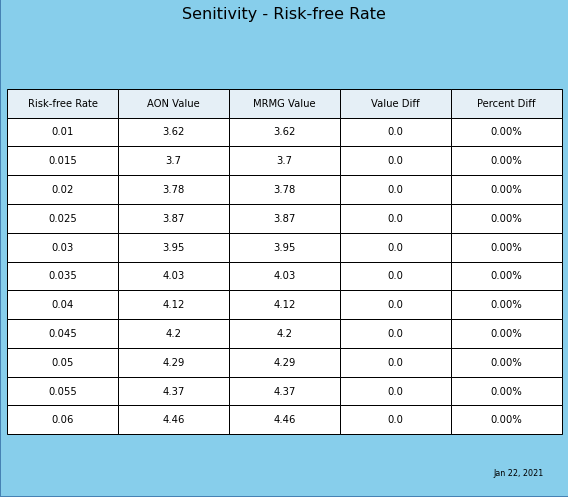

In [21]:
sensitivity_label = 'Risk-free Rate'
var = 'rate'
sensitivity_vals = np.round(np.linspace(.01,.06,11,True),3)
AON_FVs = [3.62,3.70,3.78,3.87,3.95,4.03,4.12,4.2,4.29,4.37,4.46]

sensitivity_table(myOpt, var, sensitivity_label, sensitivity_vals, AON_FVs);

# AON Sensitivity - Dividend Yield
<img src="Pricing Samples - January 2020\AON_5.png" height=450px/>

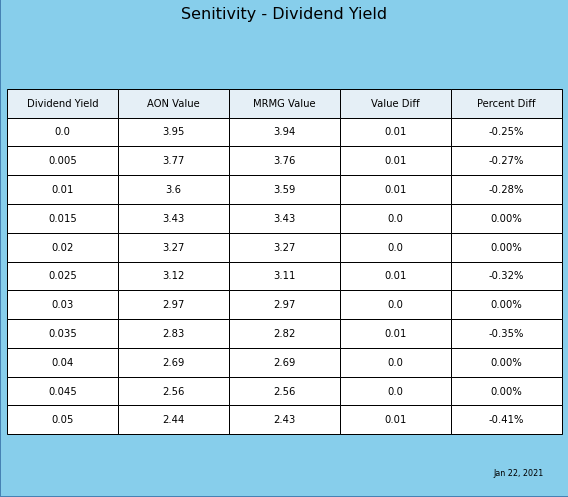

In [23]:
sensitivity_label = 'Dividend Yield'
var = 'dividend_rate'
sensitivity_vals = np.round(np.linspace(.00,.05,11,True),3)
AON_FVs = [3.95,3.77,3.6,3.43,3.27,3.12,2.97,2.83,2.69,2.56,2.44]

sensitivity_table(myOpt, var, sensitivity_label, sensitivity_vals, AON_FVs);

# AON Sensitivity - Stock Price
<img src="Pricing Samples - January 2020\AON_6.png" height=450px/>

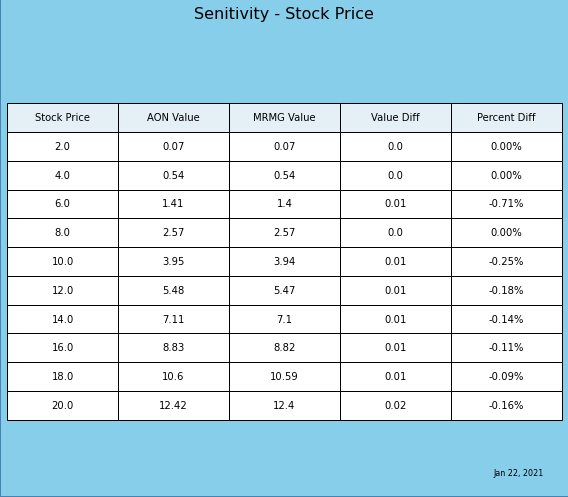

In [26]:
sensitivity_label = 'Stock Price'
var = 'spot'
sensitivity_vals = np.round(np.linspace(2,20,10,True),2)
AON_FVs = [.07,.54,1.41,2.57,3.95,5.48,7.11,8.83,10.60,12.42]

sensitivity_table(myOpt, var, sensitivity_label, sensitivity_vals, AON_FVs);